In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data from the CSV file into a DataFrame
file_path = 'external/hot-rocks/supplementary_fort_ross_temps.csv'
data = pd.read_csv(file_path, parse_dates=['dt'], date_format='%m/%d/%y %H:%M')

# had a bit of difficulty with the lack of timezones in the data, have to manually indicate no daylight savings time here
data['dt'] = pd.DatetimeIndex(data['dt']).tz_localize('America/Los_Angeles', ambiguous=False)

# assert type(index)
data.set_index('dt', inplace=True)
data.sort_index(inplace=True)
data.head()

,unit,temp,rock,elev
dt,,,,
2015-06-19 00:00:00-07:00,C,11.0,R05,low
2015-06-19 00:01:00-07:00,C,10.5,R07,low
2015-06-19 00:02:00-07:00,C,10.5,R15,low
2015-06-19 00:02:00-07:00,C,11.0,R33,high
2015-06-19 00:03:00-07:00,C,11.0,R06,low


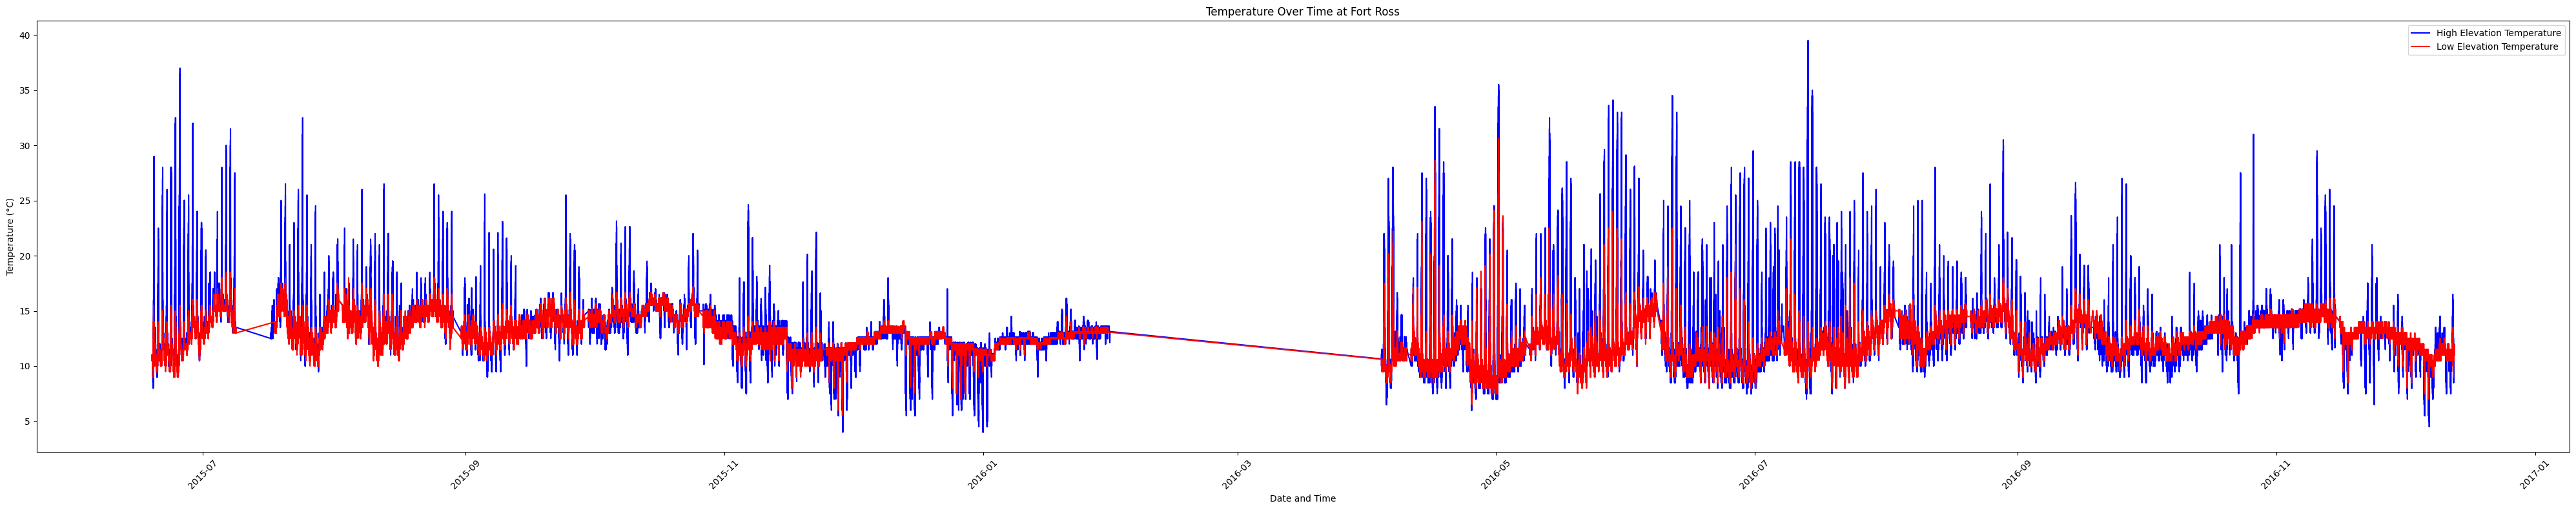

In [6]:
data_high = data[data['elev'] == 'high']
data_low = data[data['elev'] == 'low']


# Plotting the temperatures over time for both high and low elevations
plt.figure(figsize=(40, 8))
plt.plot(data_high.index, data_high['temp'], label='High Elevation Temperature', color='blue')
plt.plot(data_low.index, data_low['temp'], label='Low Elevation Temperature', color='red')
plt.title('Temperature Over Time at Fort Ross')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
